# PoC - General Overveiw of the Data

## Libraries

In [1]:
# Utils
from pprint import pprint

# Data loading and manipulation
import numpy as np
import kagglehub
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

/home/druiz35/Documents/SEpsilon/SEpsilon-Proyectos/AI-ML-Data/CreditRiskScore/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [2]:
# Download latest version
path = kagglehub.dataset_download("ranadeep/credit-risk-dataset") + "/loan/loan.csv"

print("Path to dataset files:", path)

Path to dataset files: /home/druiz35/.cache/kagglehub/datasets/ranadeep/credit-risk-dataset/versions/3/loan/loan.csv


In [3]:
df = pd.read_csv(path)

pd.set_option('display.max_columns', None)

/tmp/ipykernel_336214/3184681993.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## Estructura del dataset

### Dimensiones

In [4]:
shape = df.shape
n_rows = shape[0]
n_cols = shape[1]
print(f"Número de filas: {n_rows}")
print(f"Número de columnas: {n_cols}")

Número de filas: 887379
Número de columnas: 74


### Primeras 5 rows

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Últimas 5 rows

In [6]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


### Información general del dataset (nombres de columnas, no-nulls, tipos de datos)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

# Criterios para limpieza de datos previo al análisis descriptivo univariado y multivariado

Las columnas que se van a dejar para entrenar el modelo deberán seguir los siguientes criterios:
1. El porcentaje de valores no nulls no debe superar el 80%.
2. No se dejarán columnas de texto plano. Se aceptarán columnas categóricas y ordinales que luego se codificarán.

## Criterio 1: El porcentaje de valores no nulls no debe superar el 80%.
* Approach: Se eliminarán todas las columnas que tengan más del 80% de sus valores como nulls.

In [8]:
df_null_count = df.isna().sum().to_frame()
df_null_count.columns = ["count"]
df_null_count["percentage"] = df_null_count["count"] / n_rows * 100
df_null_count[df_null_count["count"] != 0]


,count,percentage
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761353,85.797951
title,153,0.017242
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


In [9]:
null80_cols = df_null_count[df_null_count["percentage"] > 80].reset_index()
null80_cols

,index,count,percentage
0,desc,761353,85.797951
1,mths_since_last_record,750326,84.555303
2,annual_inc_joint,886868,99.942415
3,dti_joint,886870,99.942640
4,verification_status_joint,886868,99.942415
5,open_acc_6m,866007,97.591559
6,open_il_6m,866007,97.591559
7,open_il_12m,866007,97.591559
8,open_il_24m,866007,97.591559
9,mths_since_rcnt_il,866569,97.654892


In [10]:
null70_cols = df_null_count[df_null_count["percentage"] > 70].reset_index()
null70_cols

,index,count,percentage
0,desc,761353,85.797951
1,mths_since_last_record,750326,84.555303
2,mths_since_last_major_derog,665676,75.015974
3,annual_inc_joint,886868,99.942415
4,dti_joint,886870,99.942640
5,verification_status_joint,886868,99.942415
6,open_acc_6m,866007,97.591559
7,open_il_6m,866007,97.591559
8,open_il_12m,866007,97.591559
9,open_il_24m,866007,97.591559


In [11]:
threshold = 0.8
c1_df = df.drop(columns=null80_cols["index"].to_list())
print(f"Cantidad de columnas antes de aplicar criterio 1: {df.shape[1]}")
print(f"Cantidad de columnas después de aplicar criterio 1: {c1_df.shape[1]}")

Cantidad de columnas antes de aplicar criterio 1: 74
Cantidad de columnas después de aplicar criterio 1: 55


## Criterio 2: No se dejarán columnas de texto plano. Se aceptan columnas categóricas y ordinales que luego se codificarán.
* Approach: Revisar las columnas que son de tipo object y revisar sus valores únicos. Si no se identifica ninguna categoría o estructura en la columna, descartarla.

### Separación de columnas numéricas y no numéricas

In [12]:
c1_df_column_types = c1_df.dtypes.to_frame().reset_index()
c1_df_column_types.columns = ["column_name", "type"]

c1_df_int_columns = c1_df_column_types[c1_df_column_types["type"] == "int64"]["column_name"].to_list()
c1_df_float_columns = c1_df_column_types[c1_df_column_types["type"] == "float64"]["column_name"].to_list()
c1_df_object_columns = c1_df_column_types[c1_df_column_types["type"] == "object"]["column_name"].to_list()

### Mostrar nombres de columnas no numéricas

In [13]:
#df_object = c1_df.loc[c1_df_object_columns]
pprint(c1_df_object_columns)

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']


### Checkeo de valores únicos por columna

In [14]:
print("Cantidad de valores únicos por columna: ")
for obj_col in c1_df_object_columns:
    unique_vals = c1_df[obj_col].unique()
    print(f"{obj_col}: {len(unique_vals)}")
    print(unique_vals[:20])
    print("\n")

Cantidad de valores únicos por columna: 
term: 2
[' 36 months' ' 60 months']


grade: 7
['B' 'C' 'A' 'E' 'F' 'D' 'G']


sub_grade: 35
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2']


emp_title: 299272
[nan 'Ryder' 'AIR RESOURCES BOARD' 'University Medical Group'
 'Veolia Transportaton' 'Southern Star Photography' 'MKC Accounting '
 'Starbucks' 'Southwest Rural metro' 'UCLA'
 'Va. Dept of Conservation/Recreation' 'Target' 'SFMTA'
 'Internal revenue Service' "Chin's Restaurant" 'Duracell'
 'Connection Inspection' 'Network Interpreting Service'
 'Archdiocese of Galveston Houston' 'Osram Sylvania']


emp_length: 12
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


home_ownership: 6
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


verification_status: 3
['Verified' 'Source Verified' 'Not Verified']


issue_d: 103
['Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-201

### Drop de columnas de texto plano

In [15]:
c2_df = c1_df.drop(columns=["emp_title", "title", "url"])
print(f"Cantidad de columnas antes de aplicar criterio 2: {c1_df.shape[1]}")
print(f"Cantidad de columnas después de aplicar criterio 2: {c2_df.shape[1]}")

Cantidad de columnas antes de aplicar criterio 2: 55
Cantidad de columnas después de aplicar criterio 2: 52


## Criterio 3: No se dejarán columnas de identificación, ya que son para identificar filas y entidades y no mostrarán ningún patrón relevante para el análisis

In [16]:
c3_df = c2_df.drop(columns=["id", "member_id"])
print(f"Cantidad de columnas antes de aplicar criterio 3: {c2_df.shape[1]}")
print(f"Cantidad de columnas después de aplicar criterio 3: {c3_df.shape[1]}")

Cantidad de columnas antes de aplicar criterio 3: 52
Cantidad de columnas después de aplicar criterio 3: 50


## Criterio 4: Se descartarán columnas que tengan solamente un valor único

In [17]:
print("Columnas con un solo valor único:")
for col in c3_df.columns:
    if len(c3_df[col].unique()) == 1:
        print(f"    * {col}")

Columnas con un solo valor único:
    * policy_code


In [18]:
cleaned_df = c3_df.drop(columns=["policy_code"])
print(f"Cantidad de columnas antes de aplicar criterio 4: {c3_df.shape[1]}")
print(f"Cantidad de columnas después de aplicar criterio 4: {cleaned_df.shape[1]}")

Cantidad de columnas antes de aplicar criterio 4: 50
Cantidad de columnas después de aplicar criterio 4: 49


# Análisis Exploratorio de Datos

### Descripción estadística general de cada columna numérica, con conteo, media, desviación estándar, mínimo, máximo y cuartiles.

In [19]:
cleaned_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


## Separación de columnas numéricas vs no numéricas

In [20]:
cleaned_df_column_types = cleaned_df.dtypes.to_frame().reset_index()
cleaned_df_column_types.columns = ["column_name", "type"]

cleaned_df_num_columns = cleaned_df_column_types[cleaned_df_column_types["type"] == "float64"]["column_name"].to_list()
cleaned_df_object_columns = cleaned_df_column_types[cleaned_df_column_types["type"] == "object"]["column_name"].to_list()

cleaned_df_num = cleaned_df[cleaned_df_num_columns]
cleaned_df_object = cleaned_df[cleaned_df_object_columns]

print("Numerical Columns:")
for col in cleaned_df_num_columns:
    print(f"    * {col}")
print("\n")

print("Non-Numerical Columns:")
for col in cleaned_df_object_columns:
    print(f"    * {col}")
print("\n")

Numerical Columns:
    * loan_amnt
    * funded_amnt
    * funded_amnt_inv
    * int_rate
    * installment
    * annual_inc
    * dti
    * delinq_2yrs
    * inq_last_6mths
    * mths_since_last_delinq
    * open_acc
    * pub_rec
    * revol_bal
    * revol_util
    * total_acc
    * out_prncp
    * out_prncp_inv
    * total_pymnt
    * total_pymnt_inv
    * total_rec_prncp
    * total_rec_int
    * total_rec_late_fee
    * recoveries
    * collection_recovery_fee
    * last_pymnt_amnt
    * collections_12_mths_ex_med
    * mths_since_last_major_derog
    * acc_now_delinq
    * tot_coll_amt
    * tot_cur_bal
    * total_rev_hi_lim


Non-Numerical Columns:
    * term
    * grade
    * sub_grade
    * emp_length
    * home_ownership
    * verification_status
    * issue_d
    * loan_status
    * pymnt_plan
    * purpose
    * zip_code
    * addr_state
    * earliest_cr_line
    * initial_list_status
    * last_pymnt_d
    * next_pymnt_d
    * last_credit_pull_d
    * application_type



## Análisis Univariado

### Columnas Numéricas

#### Estadísticas descriptivas

In [21]:
desc_stats_num = cleaned_df_num.describe()
desc_stats_num.loc[-1] = cleaned_df_num.skew()
desc_stats_num.loc[-2] = cleaned_df_num.kurt()
desc_stats_num.index = ["count", "mean", "std", "min", "25%", "50%", "75%", "max", "skewness", "kurtosis"]
desc_stats_num

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06
skewness,0.681683,0.683745,0.680983,0.429481,0.936952,4.447849e+01,441.486775,5.473796,2.108411,0.455520,1.249380,13.261941,1.594930e+01,-0.123869,0.892539,0.932018,0.931868,1.788894,1.793832,1.935036,2.826100,17.404085,18.061839,29.655693,3.475852,17.410400,0.264932,24.066357,8.561805e+02,2.918174e+00,7.304552e+01
kurtosis,-0.256715,-0.251638,-0.251765,-0.155362,0.685970,4.808192e+03,256126.862941,57.309081,11.925103,-0.767314,3.103994,993.199008,9.858908e+02,1.027269,1.377589,0.122621,0.121827,3.620120,3.641981,3.989046,11.543598,515.724165,617.211417,1684.165364,13.355772,1097.854795,-0.031362,1630.866453,7.596112e+05,2.940881e+01,1.840039e+04


#### Nulls y Conteo de Valores

In [22]:
cleaned_df_num_null_count = cleaned_df_num.isna().sum().to_frame()
cleaned_df_num_null_count.columns = ["count"]
cleaned_df_num_null_count["percentage"] = cleaned_df_num_null_count["count"] / n_rows * 100
cleaned_df_num_null_count[cleaned_df_num_null_count["count"] != 0]

,count,percentage
annual_inc,4,0.000451
delinq_2yrs,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
open_acc,29,0.003268
pub_rec,29,0.003268
revol_util,502,0.056571
total_acc,29,0.003268
collections_12_mths_ex_med,145,0.016340
mths_since_last_major_derog,665676,75.015974


In [23]:
print("CONTEO DE VALORES")
print("Se mostrarán los valores de columnas con menos de 300 valores únicos")
for col in cleaned_df_num_columns:
    unique_vals = cleaned_df_num[col].unique()
    print(f"{col}: {len(unique_vals)}")
    if len(unique_vals) <= 300:
        print(f"{unique_vals[:20]}")
    print("\n")

CONTEO DE VALORES
Se mostrarán los valores de columnas con menos de 300 valores únicos
loan_amnt: 1372


funded_amnt: 1372


funded_amnt_inv: 9856


int_rate: 542


installment: 68711


annual_inc: 49385


dti: 4086


delinq_2yrs: 30
[ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. nan 13. 15. 10. 12. 17. 18.
 29. 24.]


inq_last_6mths: 29
[ 1.  5.  2.  0.  3.  4.  6.  7.  8.  9. 10. 11. 12. 15. 14. 33. 17. 32.
 24. 13.]


mths_since_last_delinq: 156
[nan 35. 38. 61.  8. 20. 18. 68. 45. 48. 41. 40. 74. 25. 53. 39. 10. 26.
 56. 77.]


open_acc: 78
[ 3.  2. 10. 15.  9.  7.  4. 11. 14. 12. 20.  8.  6. 17.  5. 13. 16. 30.
 21. 18.]


pub_rec: 33
[ 0.  1.  2.  3.  4.  5. nan  6.  9.  8.  7. 11. 49. 10. 54. 12. 18. 19.
 16. 15.]


revol_bal: 73740


revol_util: 1357


total_acc: 136
[ 9.  4. 10. 37. 38. 12. 11. 13.  3. 23. 34. 29. 28. 42. 14. 22. 21. 17.
  7. 31.]


out_prncp: 248332


out_prncp_inv: 266244


total_pymnt: 506726


total_pymnt_inv: 506616


total_rec_prncp: 260227


total_rec_int

#### Distribución e Identificación de Outliers

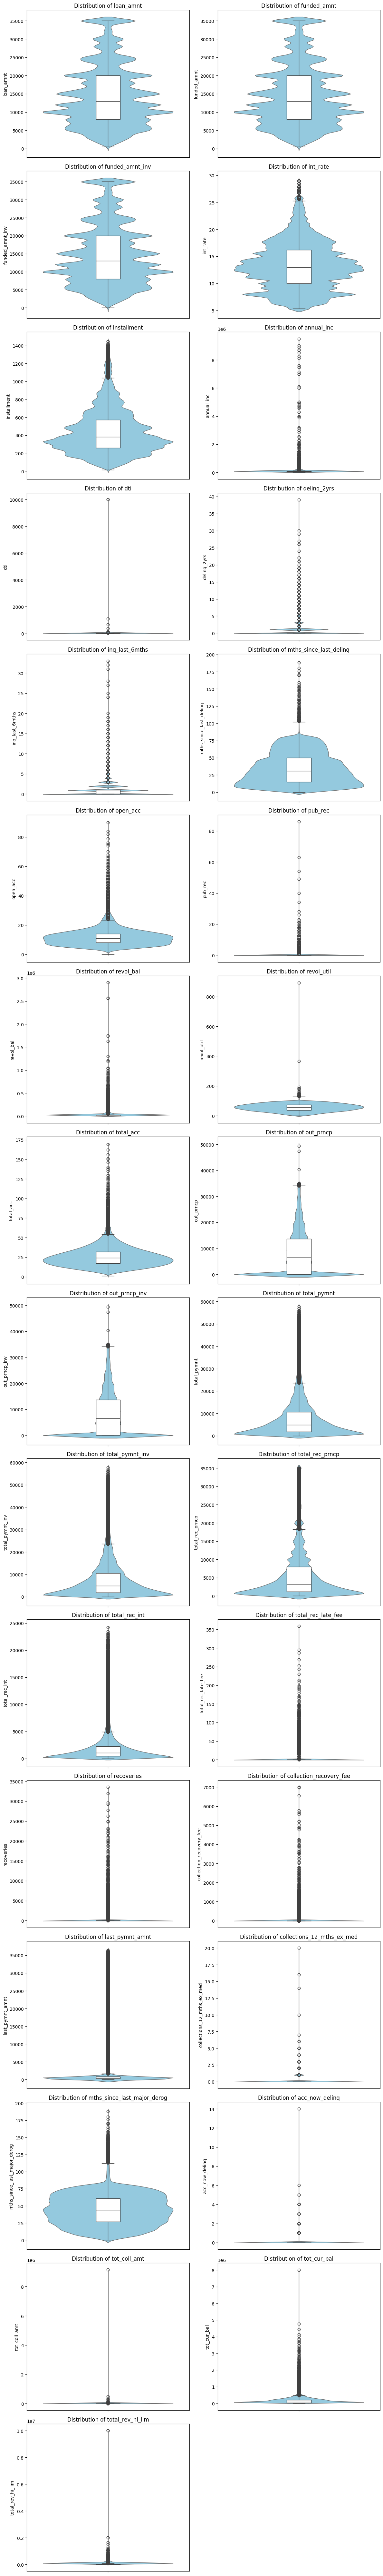

In [24]:
n_cols_graph = 2
n_rows_graph = (len(cleaned_df_num_columns) + n_cols_graph - 1) // n_cols_graph

fig, axes = plt.subplots(n_rows_graph, n_cols_graph, figsize=(6 * n_cols_graph, 5 * n_rows_graph))
axes = axes.flatten()

for i, feature in enumerate(cleaned_df_num_columns):
    sns.violinplot(y=df[feature], ax=axes[i], inner=None, color="skyblue", linewidth=1)
    sns.boxplot(y=df[feature], ax=axes[i], width=0.15, boxprops={'facecolor':'white'})
    axes[i].set_title(f'Distribution of {feature}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("ViolinAndBoxplots.png")
#plt.show()


In [25]:
# IQR Outlier Detector
def IQR_outlier_detector(df):
    cols = df.columns
    accum = dict((col, []) for col in cols)
    for index, row in df.iterrows():
        for col in cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3-Q1
            low_lim = Q1 - 1.5*IQR
            up_lim = Q3 + 1.5*IQR
            if row[col] >= low_lim and row[col] <= up_lim:
                continue
            else:
                #print(f"OUTLIER DETECTADO! Col: {col} Index: {index}")
                accum[col].append(row)
                break
    return accum
#filtered_df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]
#outlier_rows = IQR_outlier_detector(cleaned_df_num)
#pprint(outlier_rows)

### Columnas Categóricas

#### Distribución de frecuencias y cardinalidad

In [26]:
print("Valores únicos de variables categóricas y ordinales:")
for col in cleaned_df_object_columns:
    unique_values = cleaned_df_object[col].unique()
    print(f"{col}: {len(unique_values)}")
    print(unique_values)
    print("\n")
    

Valores únicos de variables categóricas y ordinales:
term: 2
[' 36 months' ' 60 months']


grade: 7
['B' 'C' 'A' 'E' 'F' 'D' 'G']


sub_grade: 35
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


emp_length: 12
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


home_ownership: 6
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


verification_status: 3
['Verified' 'Source Verified' 'Not Verified']


issue_d: 103
['Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-2010' 'Oct-2010' 'Sep-2010' 'Aug-2010' 'Jul-2010'
 'Jun-2010' 'May-2010' 'Apr-2010' 'Mar-2010' 'Feb-2010' 'Jan-2010'
 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Sep-2009' 'Aug-2009' 'Jul-2009'
 'Jun-2009' 'May-2009' 'Apr-2009' 'Mar-2009' 'Feb-2

#### Value Counts

In [27]:
print("Valores únicos de variables categóricas y ordinales:")
for col in cleaned_df_object_columns:
    value_counts = cleaned_df_object[col].value_counts().to_frame()
    value_counts["percentage"] = value_counts["count"] / value_counts["count"].sum() * 100
    print(f"{col}: ")
    print(value_counts)
    print("\n")


Valores únicos de variables categóricas y ordinales:
term: 
            count  percentage
term                         
36 months  621125   69.995459
60 months  266254   30.004541


grade: 
        count  percentage
grade                    
B      254535   28.683911
C      245860   27.706313
A      148202   16.701094
D      139542   15.725186
E       70705    7.967847
F       23046    2.597086
G        5489    0.618563


sub_grade: 
           count  percentage
sub_grade                   
B3         56323    6.347119
B4         55626    6.268573
C1         53387    6.016257
C2         52236    5.886549
C3         50161    5.652714
C4         48857    5.505765
B5         48833    5.503060
B2         48781    5.497200
B1         44972    5.067959
A5         44816    5.050379
C5         41219    4.645028
D1         36238    4.083712
A4         34531    3.891347
D2         29803    3.358542
D3         26554    2.992408
D4         25558    2.880167
A3         23457    2.643403
A1         

#### Bar Plots

/tmp/ipykernel_336214/1045907112.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette="viridis")
/tmp/ipykernel_336214/1045907112.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette="viridis")
/tmp/ipykernel_336214/1045907112.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette="viridis")
/tmp/ipykernel_336214/1045907112.py:18: FutureWarning: 

Pass

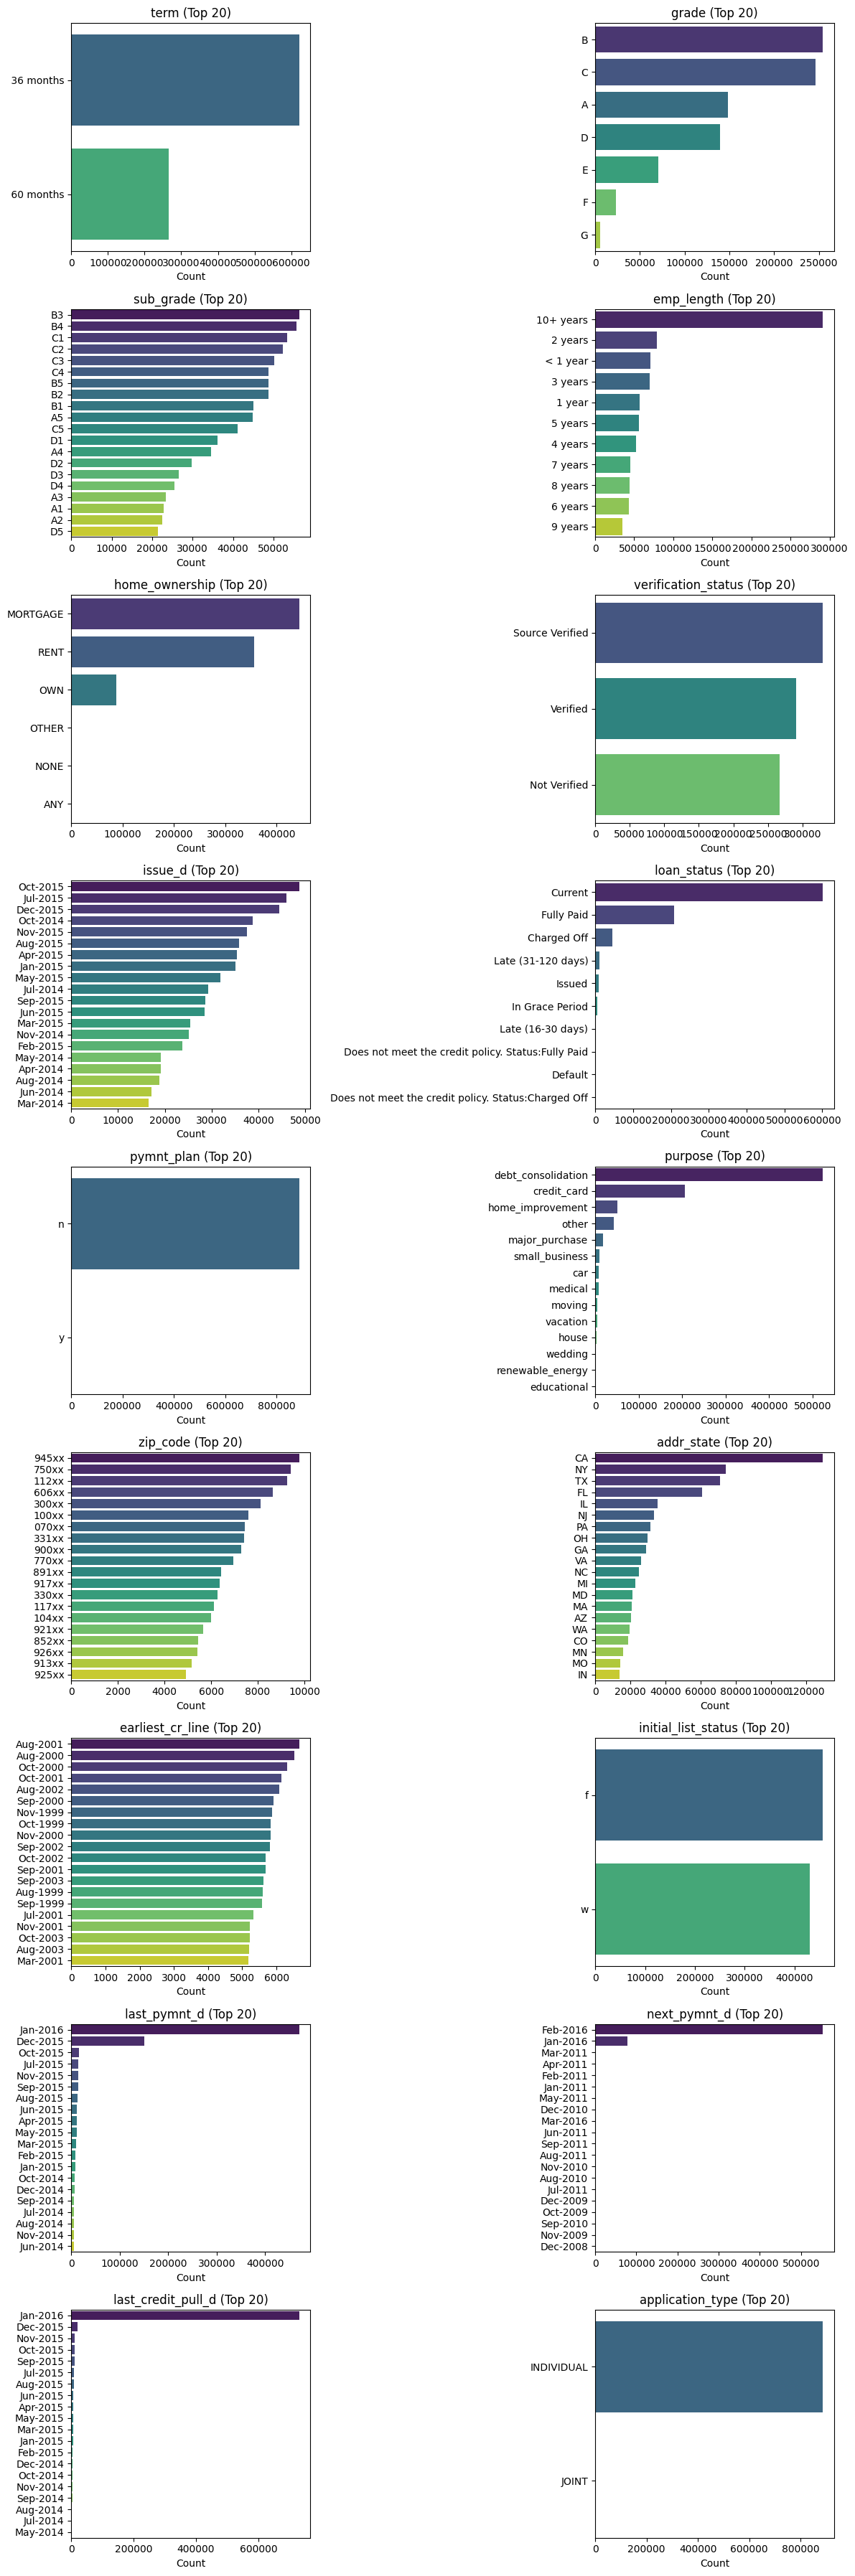

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = cleaned_df_object.select_dtypes(include='object').columns

n_cols_graph = 2
n_rows_graph = (len(cat_cols) + n_cols_graph - 1) // n_cols_graph

fig, axes = plt.subplots(n_rows_graph, n_cols_graph, figsize=(6 * n_cols_graph, 4 * n_rows_graph))

if isinstance(axes, plt.Axes):
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(cat_cols):
    value_counts = df[col].value_counts().head(20)  # show top 20 categories
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f'{col} (Top 20)')
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.savefig("CategDistributions.png")


Se ha identificado que las siguientes variables tienen poca varianza, son redundantes o simplemente no agregan ningún valor adicional al dataset:
* grade
* home_ownership
* pymnt_plan
* zip_code
* last_pymnt_d
* next_pymnt_d
* last_credit_pull_d
* application_type

Se procederá a eliminarlas por completo o a quitar las filas con valores menos frecuentes para un paso adicional de limpieza del dataframe.

In [29]:
# Variables con poca varianza
poca_varianza = {
    "home_ownership": ["RENT", "MORTGAGE", "OWN"], # Solamente dejar filas con valores "RENT", "MORTGAGE", "OWN"
    "pymnt_plan": ["n"], # Solamente dejar filas con valores "n"
    #"last_pymnt_d": ["Jan-2016", "Dec-2015"], # Solamente dejar filas con valores "Jan-2016", "Dec-2015"
    #"next_pymnt_d": ["Feb-2016", "Jan-2016"], # Solamente dejar filas con valores "Feb-2016", "Jan-2016"
    #"last_credit_pull_d": ["Jan-2016"], # Solamente dejar filas con valores "Jan-2016"
    "application_type": ["INDIVIDUAL"], # Solamente dejar filas con valores "INDIVIDUAL"
}

print(f"Número de rows antes de la limpieza: {cleaned_df.shape[0]}")
for col, values in poca_varianza.items():
    cleaned_df = cleaned_df[cleaned_df[col].isin(values)]
    print(cleaned_df[col].value_counts())
print(f"Número de rows después de la limpieza: {cleaned_df.shape[0]}")

# Variables redundantes y no significativas
redundantes_y_no_significativas = [
    "grade", # sub_grade es más descriptiva
    "zip_code", # Se utilizará el estado en lugar del zip_code
    "last_pymnt_d", # Por ahora, se removerán las fechas de los features.
    "next_pymnt_d", # Por ahora, se removerán las fechas de los features.
    "issue_d", # Por ahora, se removerán las fechas de los features.
    "earliest_cr_line",
    "last_credit_pull_d" # Por ahora, se removerán las fechas de los features.
]

cleaned_df = cleaned_df.drop(columns=redundantes_y_no_significativas)
cleaned_df = cleaned_df.drop(columns=["pymnt_plan", "application_type"]) # Estas columnas solamentes tienen un valor. Las eliminaremos




Número de rows antes de la limpieza: 887379
home_ownership
MORTGAGE    443557
RENT        356117
OWN          87470
Name: count, dtype: int64
pymnt_plan
n    887134
Name: count, dtype: int64
application_type
INDIVIDUAL    886623
Name: count, dtype: int64
Número de rows después de la limpieza: 886623


## Análisis Multivariado

### Num vs Num

In [30]:
positive = {
    "Fully Paid", 
    "Does not meet the credit policy. Status:Fully Paid"
}
negative = {
    "Charged Off",
    "Late (31-120 days)",
    "Default",
    "Does not meet the credit policy. Status:Charged Off"
}
null = {
    "Current",
    "Issued",
    "In Grace Period",
    "Late (16-30 days)",
}


def custom_target_transformer(value):
    if value in positive:
        return 0
    elif value in negative:
        return 1
    else:
        return np.nan

cleaned_df["loan_status"] = cleaned_df["loan_status"].map(custom_target_transformer)

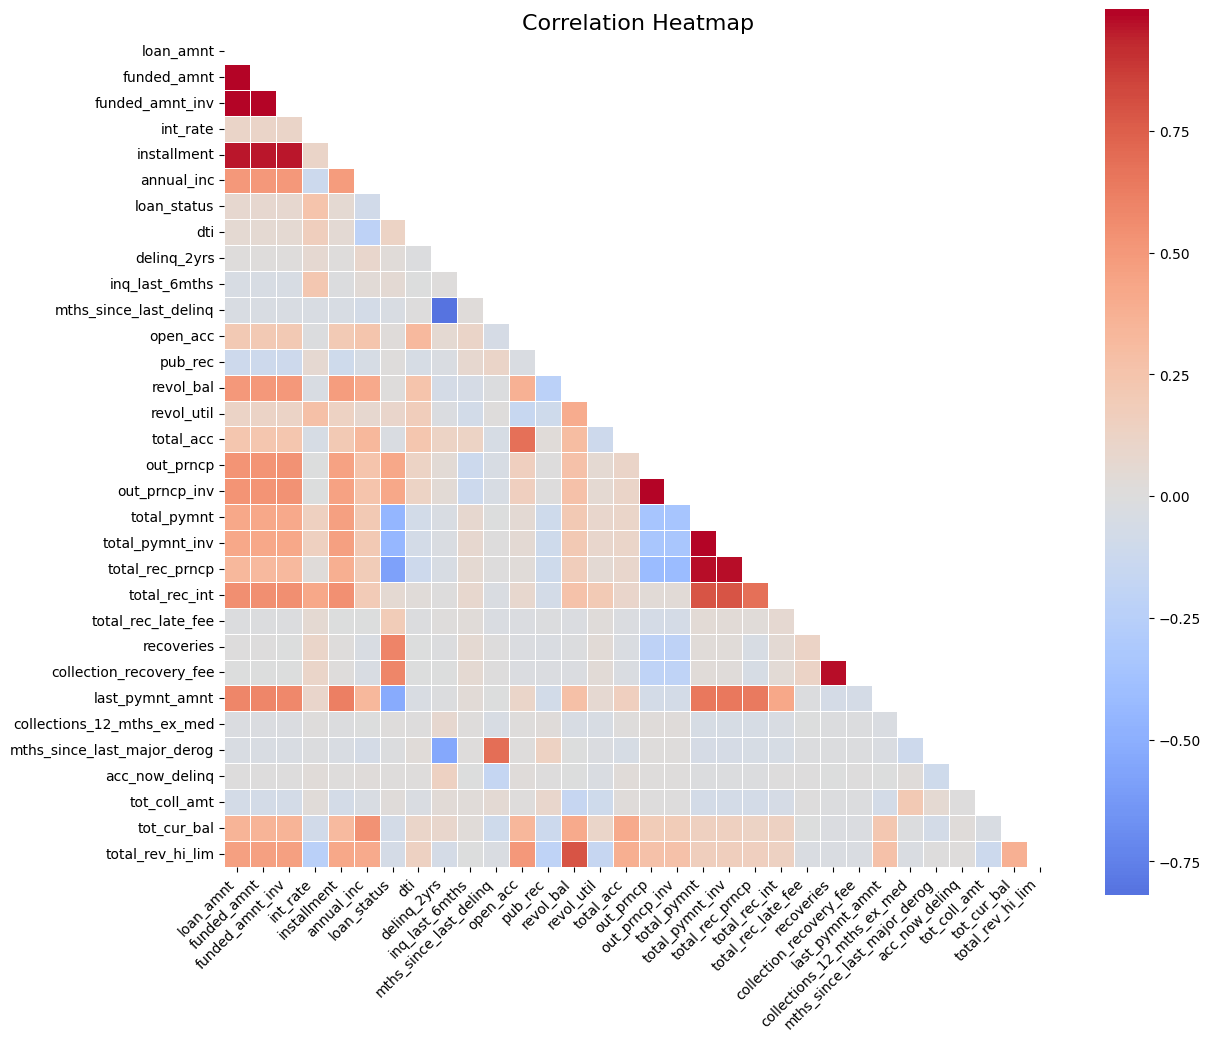

In [31]:
# Compute correlation matrix
corr = cleaned_df.corr(numeric_only=True, method="spearman")

# Optional: mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure size
plt.figure(figsize=(max(12, 0.4 * len(corr.columns)), max(10, 0.4 * len(corr.columns))))

# Create heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=False,           
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Análisis de target

In [32]:
loan_status_balance = cleaned_df["loan_status"].value_counts(dropna=False).to_frame()
loan_status_balance.columns = ["count"]
loan_status_balance["percentage"] = loan_status_balance["count"] / loan_status_balance["count"].sum() * 100
loan_status_balance

,count,percentage
loan_status,,
NaN,618330,69.739901
0.0,209526,23.631916
1.0,58767,6.628184


Dado que los valores con el target como null no serán utilizados para el entrenamiento de ninguna forma debido a que no se sabe si estas personas pagarán su crédito, se procederá a eliminarlas.

In [33]:
cleaned_df = cleaned_df.dropna(subset=["loan_status"])
loan_status_balance = cleaned_df["loan_status"].value_counts(dropna=False).to_frame()
loan_status_balance.columns = ["count"]
loan_status_balance["percentage"] = loan_status_balance["count"] / loan_status_balance["count"].sum() * 100
loan_status_balance

,count,percentage
loan_status,,
0.0,209526,78.095962
1.0,58767,21.904038


## Guardar DataFrame limpiado

El dataframe con el que hemos estado trabajando hasta ahora ya está listo para la fase de feature engineering, así que procedemos a guardarlo en un .csv aparte.

In [34]:
cleaned_df.to_csv("cleaned_data.csv", index=False)